In [3]:
import random
import numpy as np

In [34]:
n = int(input('Количество отраслей: '))
X = [[random.randint(1, 100) for _ in range(n)] for _ in range(n)]
print('Матрица:')
for row in X:
    print(row)

Количество отраслей: 4
Матрица:
[64, 31, 65, 3]
[61, 86, 73, 33]
[37, 100, 57, 14]
[91, 99, 13, 45]


In [35]:
y = [random.randint(1, 100) for _ in range(n)]
x = [sum(X[i]) + y[i] for i in range(n)]
print('Вектор конечного потребления:', y)
print('Вектор объемов производства по отраслям:', x)

Вектор конечного потребления: [85, 73, 89, 77]
Вектор объемов производства по отраслям: [248, 326, 297, 325]


In [36]:
A = [[X[i][j] / x[i] for i in range(n)] for j in range(n)]
print("Матрица прямых затрат:")
for row in A:
    print(row)

Матрица прямых затрат:
[0.25806451612903225, 0.18711656441717792, 0.12457912457912458, 0.28]
[0.125, 0.26380368098159507, 0.3367003367003367, 0.3046153846153846]
[0.2620967741935484, 0.22392638036809817, 0.1919191919191919, 0.04]
[0.012096774193548387, 0.10122699386503067, 0.04713804713804714, 0.13846153846153847]


In [37]:
EA = np.eye(n) - A
S = np.linalg.inv(EA)
print('Матрица полных затрат:\n', S)
print('\nПроверка обратной матрицы:\n', S.dot(EA))
if np.all(S > 0):
    print('\nМатрица A продуктивна')

Матрица полных затрат:
 [[1.70465461 0.73764832 0.61936323 0.84358027]
 [0.69431484 1.96667732 0.98287682 0.9666468 ]
 [0.75255772 0.79834929 1.72156061 0.60678436]
 [0.14668913 0.28511394 0.21837327 1.31933515]]

Проверка обратной матрицы:
 [[ 1.00000000e+00 -2.30571829e-17  7.42157377e-17  6.93808217e-17]
 [ 3.25568359e-17  1.00000000e+00  2.47129086e-17 -5.45442146e-17]
 [ 9.74321825e-17  1.32981741e-16  1.00000000e+00  2.04792798e-17]
 [ 2.36099229e-17 -2.06252846e-17  2.54812840e-17  1.00000000e+00]]

Матрица A продуктивна


In [38]:
d, v = (np.linalg.eig(A))
lambda_A = max(abs(d))
print('Число Фрабениуса:', lambda_A)

Число Фрабениуса: 0.7205473473607552


In [40]:
new_vals = {}
while True:
    inp = input('Введите номер отрасли и ее изменение в процентах (Q для завершения): ')
    if inp != 'Q':
        key, val = map(int, inp.split())
        new_vals[key] = val
    else:
        break

Введите номер отрасли и ее изменение в процентах (Q для завершения): 1 50
Введите номер отрасли и ее изменение в процентах (Q для завершения): 2 20
Введите номер отрасли и ее изменение в процентах (Q для завершения): Q


In [41]:
y1 = [y[i] * (1 + new_vals[i+1] / 100) if (i+1) in new_vals else y[i] * 1.0 for i in range(n)]
print('Новый вектор конечного потребления:', y1)

Новый вектор конечного потребления: [127.5, 87.6, 89.0, 77.0]


In [42]:
x1 = S.dot(y1)
print('Вектор новых объемов производства по отраслям:', x1)

Вектор новых объемов производства по отраслям: [402.04046463 422.71391616 365.82779594 164.70287276]


In [43]:
net_prod = []
tmp = []
for i in range(n):
    for j in range(n):
        tmp.append(A[j][i] * x1[i])
    net_prod.append(x1[i] - sum(tmp))

print("Чистая продукция:", net_prod)

Чистая продукция: [137.7961269900939, -169.58754046178876, -482.6762921862615, -809.4821767366367]


In [44]:
print("Все параметры модели: ")

print("\nМатрица случайных чисел")
for i in X:
    print(i)

print("\nВектор конечного потребления: ")
print(y)

print("\nВектор валового выпуска")
print(x)

print("\nМатрица прямых затрат")
for i in A:
    print(i)
    
print("\nМатрица полных затрат")
for i in S:
    print(i)
    
sign = False
if np.all(S > 0):
    print('\nМатрица A продуктивна')
    sign = True

w, v = (np.linalg.eig(A))
print("\nЧисло Фрабениуса:")
frab = max(w, key=abs)
print(frab)
print()

if frab < 1 and sign:
    print("Матрица A продуктивна, т.к Н > 0 и Число Фрабениуса < 1")
else:
    print("Матрица A не продуктивна т.к Число Фрабениуса > 1")
    

print("\nИзменный вектор конечного потрбеления")
print(y1)

print("\nНеобходимый объем валового выпуска каждой отрасли")
print(x1)

Все параметры модели: 

Матрица случайных чисел
[64, 31, 65, 3]
[61, 86, 73, 33]
[37, 100, 57, 14]
[91, 99, 13, 45]

Вектор конечного потребления: 
[85, 73, 89, 77]

Вектор валового выпуска
[248, 326, 297, 325]

Матрица прямых затрат
[0.25806451612903225, 0.18711656441717792, 0.12457912457912458, 0.28]
[0.125, 0.26380368098159507, 0.3367003367003367, 0.3046153846153846]
[0.2620967741935484, 0.22392638036809817, 0.1919191919191919, 0.04]
[0.012096774193548387, 0.10122699386503067, 0.04713804713804714, 0.13846153846153847]

Матрица полных затрат
[1.70465461 0.73764832 0.61936323 0.84358027]
[0.69431484 1.96667732 0.98287682 0.9666468 ]
[0.75255772 0.79834929 1.72156061 0.60678436]
[0.14668913 0.28511394 0.21837327 1.31933515]

Матрица A продуктивна

Число Фрабениуса:
(0.7205473473607552+0j)

Матрица A продуктивна, т.к Н > 0 и Число Фрабениуса < 1

Изменный вектор конечного потрбеления
[127.5, 87.6, 89.0, 77.0]

Необходимый объем валового выпуска каждой отрасли
[402.04046463 422.71391616 

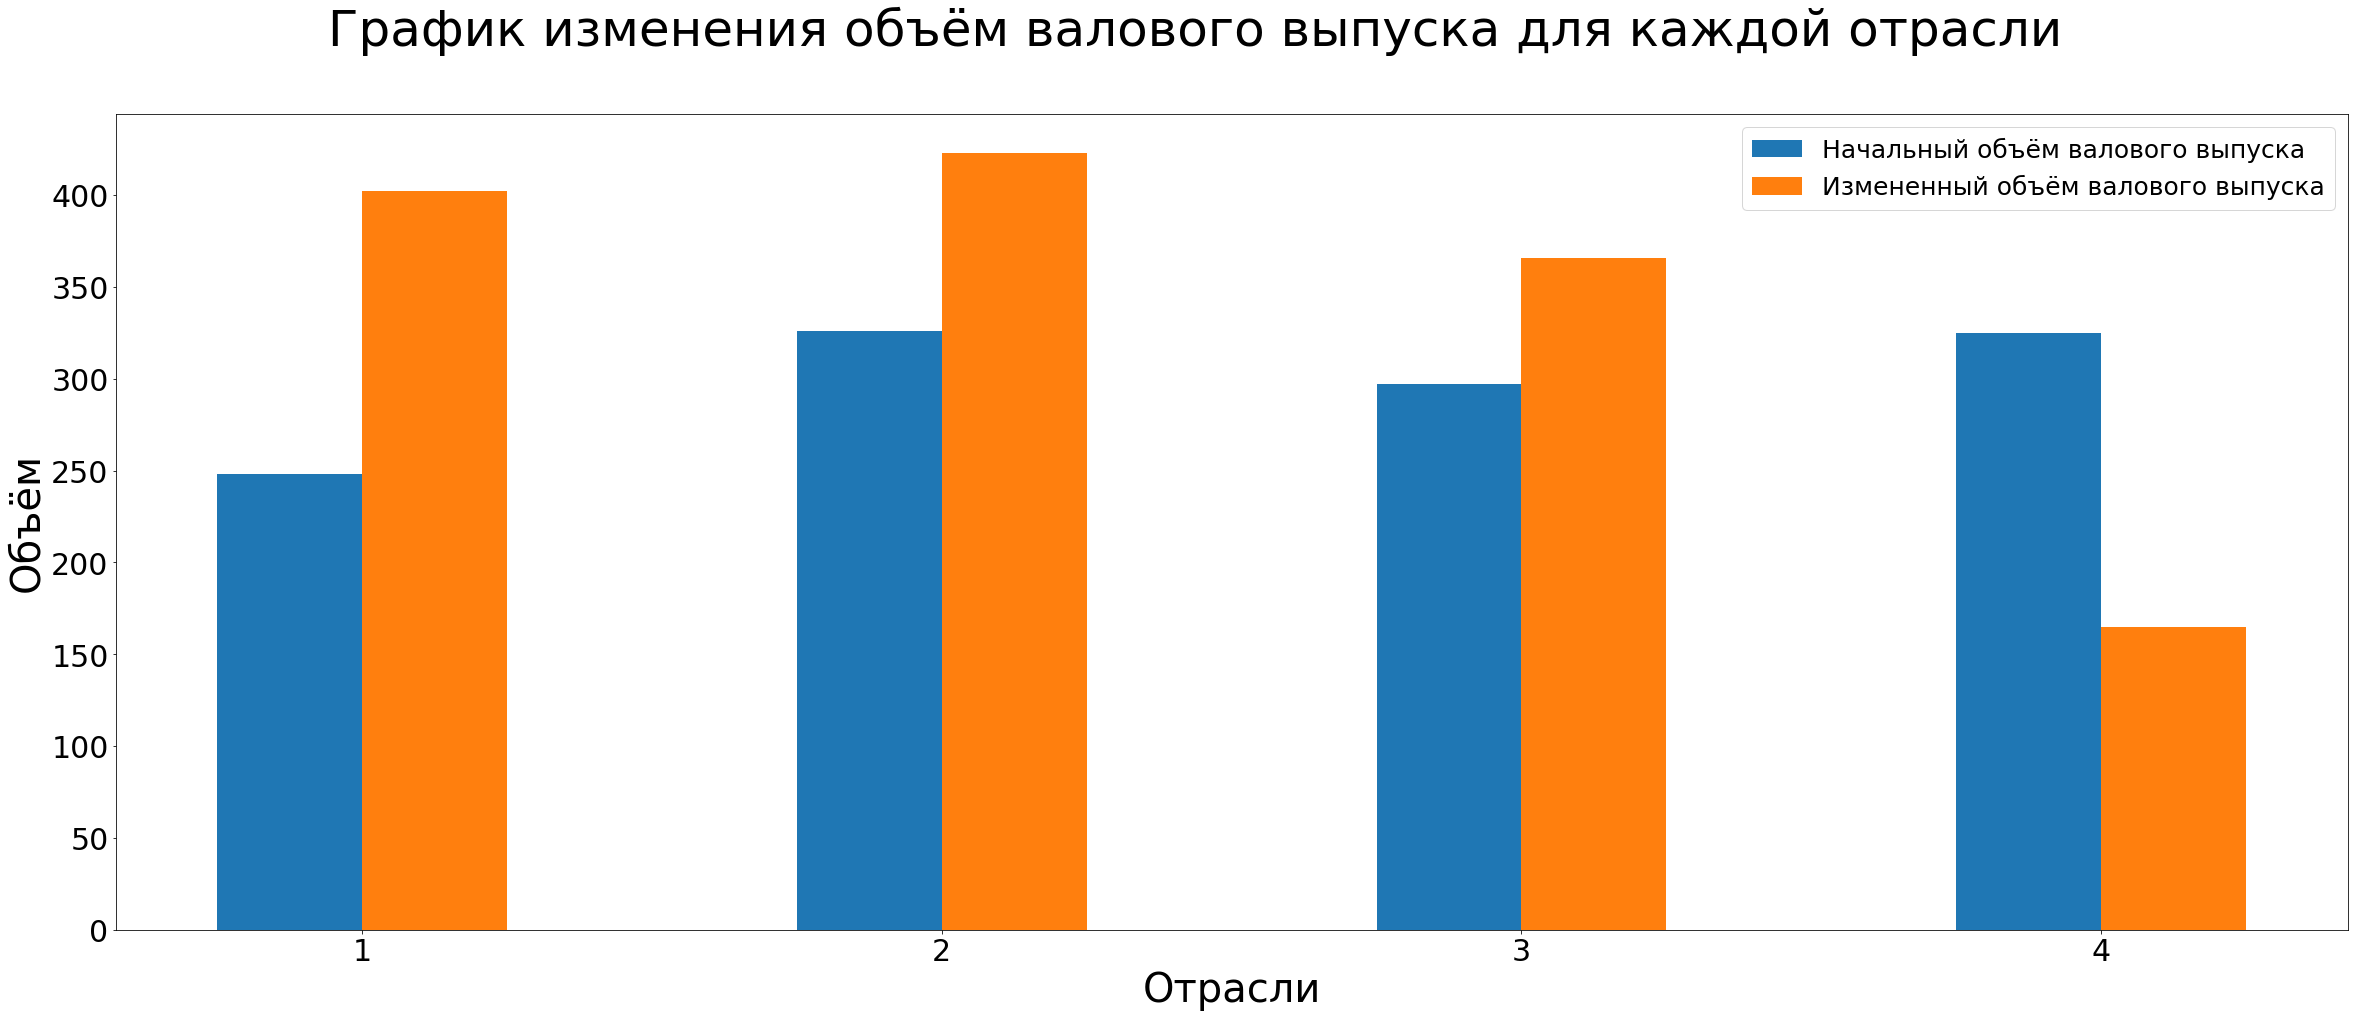

In [55]:
import matplotlib.pyplot as plt
x_n = np.arange(1, len(x) + 1)

width = 0.25
fig, ax = plt.subplots(figsize=(40,15))

rects1 = ax.bar(x_n - width/2, x, width, label='Начальный объём валового выпуска')
rects2 = ax.bar(x_n + width/2, x1, width, label='Измененный объём валового выпуска')

plt.rcParams['font.size'] = '30'

fig.suptitle('График изменения объём валового выпуска для каждой отрасли', fontsize=50)

plt.xlabel('Отрасли', fontsize=40)
plt.ylabel('Объём', fontsize=40)

ax.set_xticks(x_n)
ax.legend(fontsize = 25);
